Import Library Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

Load dataset

In [2]:
url = 'https://raw.githubusercontent.com/kevinnkevinn/data-analyst-portfolio/main/Amazon%20Stock%20Price%20Prediction/AMZN.csv'

data = pd.read_csv(url)

In [3]:
# Display the first 5 rows
print("First 5 Rows:")
data.head()

First 5 Rows:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400
1,2022-07-19,115.699997,118.949997,114.029999,118.209999,118.209999,60990000
2,2022-07-20,118.620003,123.480003,118.320000,122.769997,122.769997,71268300
3,2022-07-21,123.199997,124.849998,121.260002,124.629997,124.629997,60239900
4,2022-07-22,125.010002,125.500000,121.349998,122.419998,122.419998,51463800


In [4]:
# Display the last 5 rows
print("\nLast 5 Rows:")
data.tail()


Last 5 Rows:


,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
246,2023-07-11,127.750000,129.770004,127.349998,128.779999,128.779999,49951500
247,2023-07-12,130.309998,131.259995,128.830002,130.800003,130.800003,54022800
248,2023-07-13,134.039993,134.669998,132.710007,134.300003,134.300003,61170900
249,2023-07-14,134.059998,136.649994,134.059998,134.679993,134.679993,54388100


For data acquired from July 18, 2022 to July 14, 2023

In [5]:
data.info()
data = data.drop('Adj Close', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


Change data type

In [6]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [7]:
# Custom function to format numbers as needed
def custom_format(x):
    if abs(x) >= 1000:
        return '{:,.0f}'.format(x)
    else:
        return '{:.2f}'.format(x)

# Set pandas option to use the custom format function
pd.set_option('display.float_format', custom_format)

# Get the data description (summary statistics) of the dataset
data_describe = data.describe().T.round(2)
data_describe

# Save the data description to CSV file
data_describe.to_excel('data_describe.xlsx')

Correlation Analysis

<ipython-input-8-39339fa852ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()



Correlation Matrix:
        Open  High   Low  Close  Volume
Open    1.00  1.00  1.00   0.99   -0.29
High    1.00  1.00  1.00   1.00   -0.27
Low     1.00  1.00  1.00   1.00   -0.31
Close   0.99  1.00  1.00   1.00   -0.29
Volume -0.29 -0.27 -0.31  -0.29    1.00


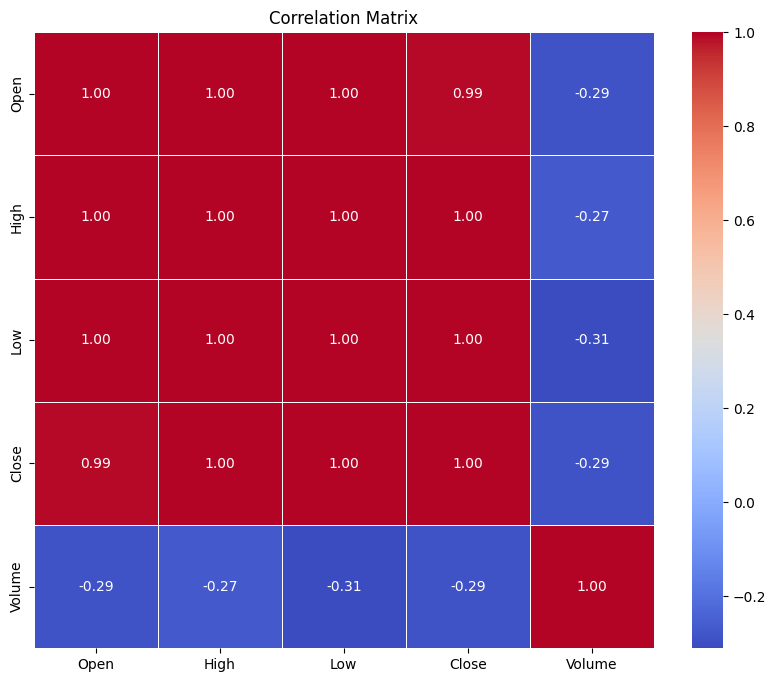

In [8]:
# Perform correlation analysis
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Function

In [9]:
# Function preparation
def plot_predictions(test, predicted):
    plt.figure(figsize=(15, 6))  # Determine graphic size (15 x 6)
    plt.plot(test, color='red', label='Actual Stock Price')
    plt.plot(predicted, color='blue', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


def evaluate_rmse(test, predicted):
    return np.sqrt(np.mean((predicted - test)**2))

Split train and test data

In [10]:
# Splitting data training & testing
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

num_train_data = len(train_data)
num_test_data = len(test_data)

print("Number of training data:", num_train_data)
print("Number of testing data:", num_test_data)

Number of training data: 175
Number of testing data: 75


Data Visualization

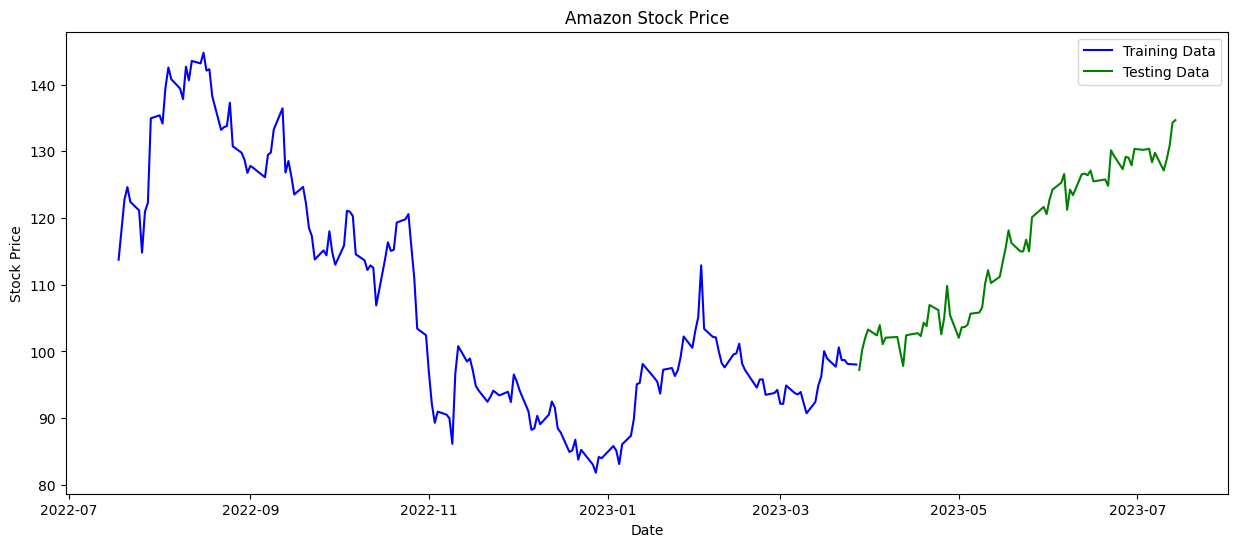

In [11]:
# Data plot visualization
plt.figure(figsize=(15, 6))  # Menentukan ukuran grafik (15 x 6)
plt.plot(train_data['Date'], train_data['Close'], color='blue', label='Training Data')
plt.plot(test_data['Date'], test_data['Close'], color='green', label='Testing Data')
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Scailing data using MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))

Data Structure and Reshaping

In [13]:
timesteps = 60  # number of timesteps to look back
X_train = []
y_train = []

for i in range(timesteps, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - timesteps:i, 0])
    y_train.append(scaled_train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Displays the results of data preparation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (115, 60, 1)
y_train shape: (115,)


Create and Train with RNN model

In [15]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
3/3 [==============================] - 4s 332ms/step - loss: 0.1288 - val_loss: 0.0669
Epoch 2/20
3/3 [==============================] - 0s 80ms/step - loss: 0.1092 - val_loss: 0.0567
Epoch 3/20
3/3 [==============================] - 0s 114ms/step - loss: 0.0955 - val_loss: 0.0496
Epoch 4/20
3/3 [==============================] - 0s 64ms/step - loss: 0.0852 - val_loss: 0.0449
Epoch 5/20
3/3 [==============================] - 0s 57ms/step - loss: 0.0771 - val_loss: 0.0408
Epoch 6/20
3/3 [==============================] - 0s 108ms/step - loss: 0.0716 - val_loss: 0.0372
Epoch 7/20
3/3 [==============================] - 0s 86ms/step - loss: 0.0663 - val_loss: 0.0341
Epoch 8/20
3/3 [==============================] - 0s 107ms/step - loss: 0.0615 - val_loss: 0.0312
Epoch 9/20
3/3 [==============================] - 0s 72ms/step - loss: 0.0570 - val_loss: 0.0280
Epoch 10/20
3/3 [==============================] - 0s 82ms/step - loss: 0.0522 - val_loss: 0.0243
Epoch 11/20
3/3 [========

Prepare test data for prediction

In [16]:
inputs = data['Close'][len(data) - len(test_data) - timesteps:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []

for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i - timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Predict stock Price

In [17]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

3/3 [==============================] - 1s 10ms/step


Calculate RMSE

In [18]:
rmse = evaluate_rmse(test_data['Close'].values, predicted_stock_price)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 15.673225015073866


Visualize the predictions

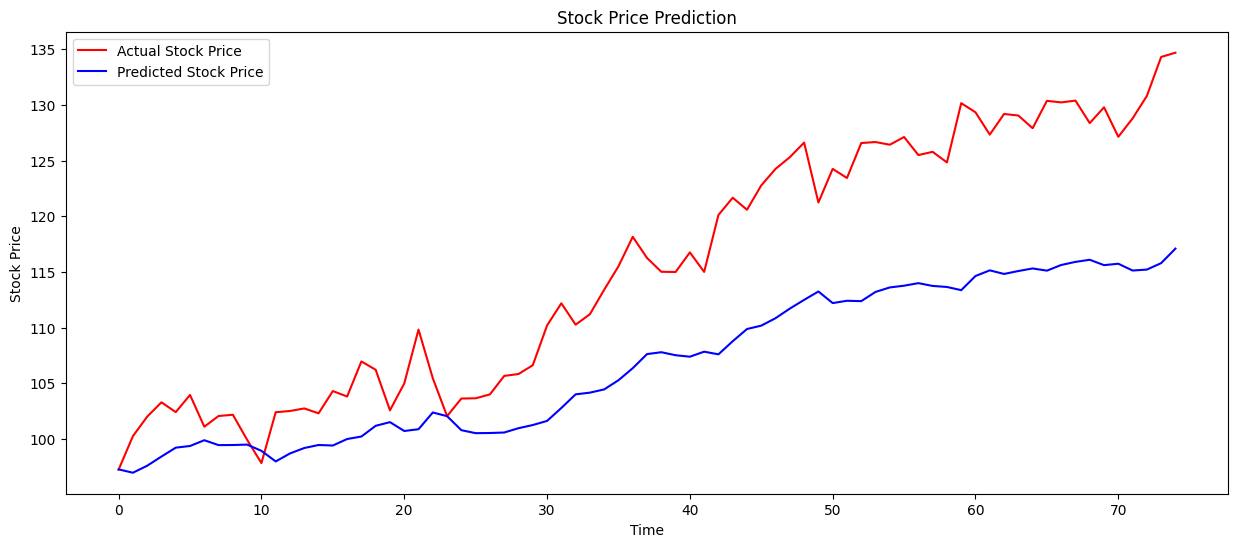

In [19]:
plot_predictions(test_data['Close'].values, predicted_stock_price)